In [2]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy import stats

import os

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load data files
df_merged_ol_prod_all = pd.read_csv("Cleaned_data\df_merged_ol_prod_all.csv")
df_merged_ol_prod_ord_all = pd.read_csv("Cleaned_data\df_merged_ol_prod_ord_all.csv")
brands = pd.read_csv(r"C:\Users\sumit\Dropbox\WBS Bootcamp\Course\3. Data cleaning project\Group 4\Cleaned_data\brands_cleaned.csv")

## Answer some quick questions

In [6]:
# Find data sample period
df_rev_monthly = df_merged_ol_prod_all.copy()
df_rev_monthly["date_max"] = pd.to_datetime(df_rev_monthly["date"]).max()
df_rev_monthly["date_min"] = pd.to_datetime(df_rev_monthly["date"]).min()
print(df_rev_monthly["date_min"].unique(), df_rev_monthly["date_max"].unique())

<DatetimeArray>
['2017-01-01 00:07:19']
Length: 1, dtype: datetime64[ns] <DatetimeArray>
['2018-03-14 13:58:36']
Length: 1, dtype: datetime64[ns]


In [5]:
# What columns are present in each data frame
print(df_merged_ol_prod_all.columns)
print(df_merged_ol_prod_ord_all.columns)

Index(['id_order', 'product_quantity', 'sku', 'unit_price', 'date', 'name',
       'desc', 'price', 'promo_price', 'in_stock', 'type', 'mod_price',
       'mod_promo_price', 'discount', 'discount_share', 'discount_unit_price',
       'discount_unit_price_share', 'combined', 'Old', 'repair service',
       'brand', 'category', 'product_type', 'unit_price_revenue',
       'promo_price_revenue', 'order_id', 'state', 'total_paid'],
      dtype='object')

In [7]:
print("The share of orders that received discounts", len(df_merged_ol_prod_ord_all.loc[df_merged_ol_prod_ord_all["discount_share"]>1])*100/len(df_merged_ol_prod_ord_all))

The share of orders that received discounts 92.89898626191004


In [8]:
print("The average discounts received is:", df_merged_ol_prod_ord_all.loc[df_merged_ol_prod_all["discount_share"]>1, "discount_share"].mean().round(2),"%")

The average discounts received is: 18.08 %


In [9]:
print("The average discounts value is:", df_merged_ol_prod_all.loc[df_merged_ol_prod_all["discount_share"]>1, "discount"].mean().round(2))

The average discounts value is: 19.83


In [10]:
print("The average price of the discounted product is:", df_merged_ol_prod_all.loc[df_merged_ol_prod_all["discount_share"]>1, "price"].mean().round(2))

The average price of the discounted product is: 158.83


In [11]:
print("The average price of the non-discounted product is:", df_merged_ol_prod_all.loc[df_merged_ol_prod_all["discount_share"]<=1, "price"].mean().round(2))

The average price of the non-discounted product is: 152.62


In [12]:
print("The # of completed orders is", len(df_merged_ol_prod_ord_all.loc[df_merged_ol_prod_ord_all["state"]=="Completed"]))

The # of completed orders is 36900


In [13]:
print("The # of sold products is", len(df_merged_ol_prod_all.loc[df_merged_ol_prod_all["state"]=="Completed", "sku"].unique()))

The # of sold products is 4654


In [14]:
df_merged_ol_prod_ord_all.head(2)

,order_id,created_date,total_paid,state,id_order,unit_price_revenue,promo_price_revenue,product_quantity,discount_share,discount_unit_price_share,diff_total_paid_unit_price,diff_total_paid_promo_price
0,241319,2017-01-02 13:35:40,44.99,Cancelled,241319,44.99,42.99,1,13.93,9.93,-0.00,2.00
1,241423,2017-11-06 13:10:02,136.15,Completed,241423,129.16,114.99,1,17.85,7.74,6.99,21.16


## Sanity check I: how clean our promo price is!

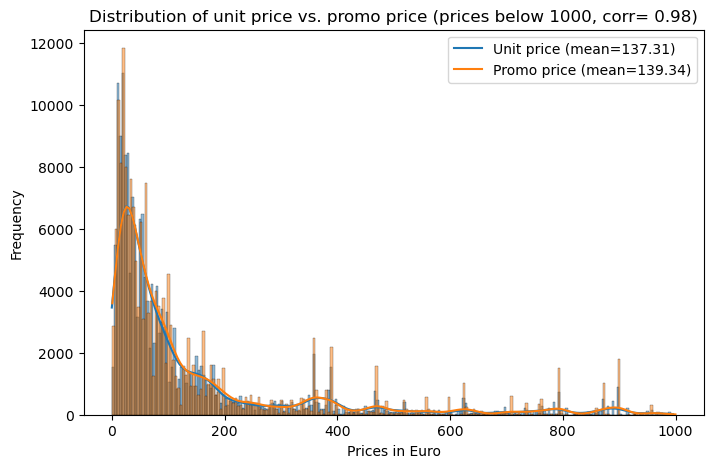

Simple correlation is                  unit_price  mod_promo_price
unit_price             1.00             0.98
mod_promo_price        0.98             1.00
unit_price        137.31
mod_promo_price   139.34
dtype: float64
K-S Statistic: 0.033917630948678945
P-value: 4.904564315256342e-92
Are the columns identical? False


<Figure size 640x480 with 0 Axes>

In [7]:
filtered_df = df_merged_ol_prod_all[(df_merged_ol_prod_all['unit_price'] < 1000) & (df_merged_ol_prod_all['mod_promo_price'] < 1000)]

# Visualize the distributions using a histogram
plt.figure(figsize=(8, 5))

sns.histplot(filtered_df['unit_price'], label='unit_price', kde=True, color='tab:blue')
sns.histplot(filtered_df['mod_promo_price'], label='mod_promo_price', kde=True, color='tab:orange')

labels = ["Unit price (mean=137.31)", "Promo price (mean=139.34)"]
plt.title('Distribution of unit price vs. promo price (prices below 1000, corr= 0.98)')
plt.xlabel('Prices in Euro')
plt.ylabel('Frequency')
plt.legend(labels=labels)
plt.show()

plt.savefig("distribution_cleaned_promo_price.png")

print(f"Simple correlation is", filtered_df[["unit_price", "mod_promo_price"]].corr())
print(filtered_df[["unit_price", "mod_promo_price"]].mean())
# Perform a statistical test (e.g., Kolmogorov-Smirnov test) for similarity
statistic, p_value = stats.ks_2samp(filtered_df['unit_price'], filtered_df['mod_promo_price'])
print(f"K-S Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check if columns are identical
are_identical = filtered_df['unit_price'].equals(filtered_df['mod_promo_price'])
print(f"Are the columns identical? {are_identical}")



## Sanity check II: how clean our promo price is!

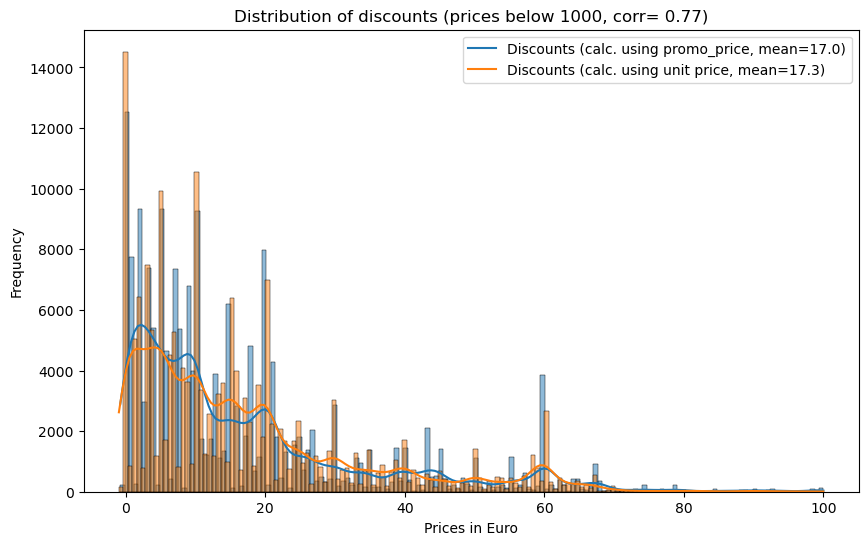

Simple correlation is                      discount  discount_unit_price
discount                 1.00                 0.77
discount_unit_price      0.77                 1.00
16.95843208242801 17.28877450462713
Are the columns identical? False


In [8]:
filtered_df = df_merged_ol_prod_all[(abs(df_merged_ol_prod_all['discount']) < 100) & (abs(df_merged_ol_prod_all['discount_unit_price']) < 100)]

# Visualize the distributions using a histogram
plt.figure(figsize=(10, 6))

sns.histplot(filtered_df['discount'], label='discount', kde=True, color='tab:blue')
sns.histplot(filtered_df['discount_unit_price'], label='discount_unit_price', kde=True, color='tab:orange')

labels = ["Discounts (calc. using promo_price, mean=17.0)", "Discounts (calc. using unit price, mean=17.3)"]
plt.title('Distribution of discounts (prices below 1000, corr= 0.77)')
plt.xlabel('Prices in Euro')
plt.ylabel('Frequency')
plt.legend(labels=labels)
plt.show()

print(f"Simple correlation is", filtered_df[["discount", "discount_unit_price"]].corr())
print(filtered_df["discount"].mean(), filtered_df["discount_unit_price"].mean())
# Check if columns are identical
are_identical = filtered_df['discount'].equals(filtered_df['discount_unit_price'])
print(f"Are the columns identical? {are_identical}")

## Evolution of the relationship between discounts and #orders 

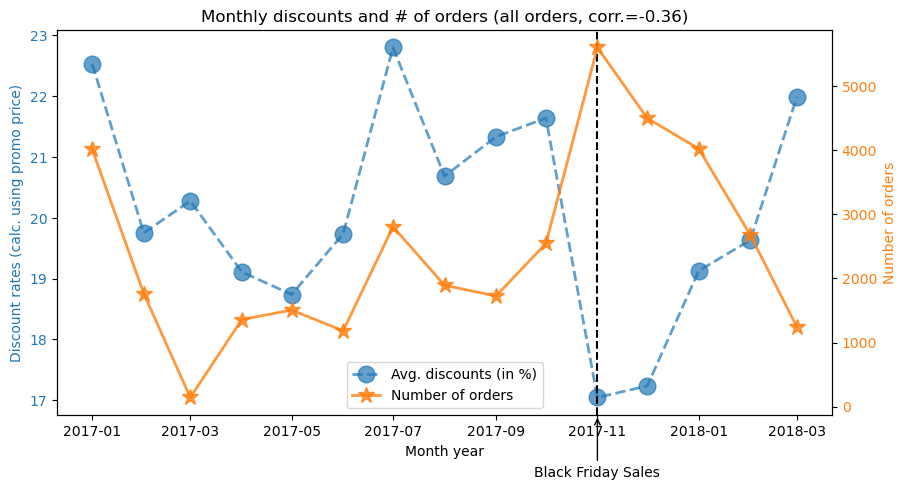

                  discount_share  product_quantity  id_order
discount_share              1.00             -0.36     -0.36
product_quantity           -0.36              1.00      1.00
id_order                   -0.36              1.00      1.00


In [9]:
# Assuming df_merged_ol_prod_all is your DataFrame
df_merged_ol_prod_all["date"] = pd.to_datetime(df_merged_ol_prod_all["date"])
df_merged_ol_prod_all['month_year'] = df_merged_ol_prod_all['date'].dt.to_period('M')
df_monthly = df_merged_ol_prod_all.loc[df_merged_ol_prod_all["state"]=="Completed"]

# Group by month_year and aggregate the mean and sum values
df_monthly = df_monthly.groupby("month_year").agg({
    "discount_unit_price_share": "mean",
    "discount_share": "mean",
    "id_order": "nunique",
    "product_quantity": "sum"
}).reset_index()

# Convert Period objects to numeric values for plotting
df_monthly["month_year_numeric"] = df_monthly["month_year"].dt.to_timestamp()

# Create subplots with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

# Plotting lines for discount_share and id_order on both y-axes
line1 = ax1.plot(df_monthly["month_year_numeric"], df_monthly["discount_share"], label='Avg. discounts (in %)', color='tab:blue', marker='o', linestyle='dashed', linewidth=2, markersize=12, alpha=0.7)[0]

line2 = ax2.plot(df_monthly["month_year_numeric"], df_monthly["id_order"], label='Number of orders', color='tab:orange', marker='*', linewidth=2, markersize=12, alpha=0.8)[0]

# Adding another line for product_quantity on the second y-axis
#line3 = ax2.plot(df_monthly["month_year_numeric"], df_monthly["product_quantity"], label='Quantity of products', color='tab:red', marker='^', linewidth=2, markersize=12, alpha=0.4)[0]

# Combine legend handles and labels from both axes
lines = ax1.get_lines() + ax2.get_lines()
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='lower center')

# Set labels and title
ax1.set_xlabel('Month year')
ax1.set_ylabel('Discount rates (calc. using promo price)', color='tab:blue')
ax2.set_ylabel('Number of orders', color='tab:orange')

# Set y-tick colors
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title("Monthly discounts and # of orders (all orders, corr.=-0.36)")

# Add a vertical line for Black Friday sales
black_friday_date = pd.to_datetime("2017-11")
ax1.axvline(x=black_friday_date, color='black', linestyle='--', label='Black Friday Sales')
ax1.annotate('Black Friday Sales', xy=(black_friday_date, ax1.get_ylim()[0]), xytext=(black_friday_date, ax1.get_ylim()[0]*0.95),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, ha='center', va='top')

plt.show()

print(df_monthly[["discount_share", "product_quantity", "id_order"]].corr())

## Shade the sample period used for the analysis

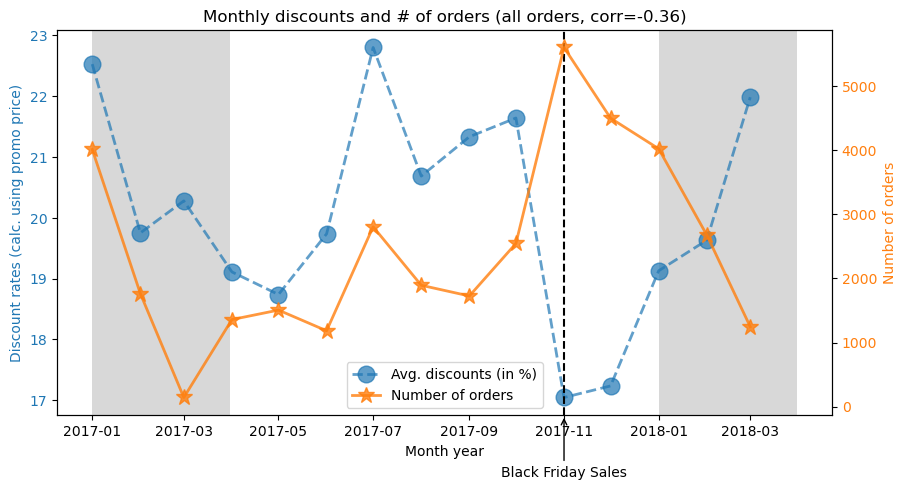

In [10]:
# Assuming df_merged_ol_prod_all is your DataFrame
df_merged_ol_prod_all["date"] = pd.to_datetime(df_merged_ol_prod_all["date"])
df_merged_ol_prod_all['month_year'] = df_merged_ol_prod_all['date'].dt.to_period('M')
df_monthly = df_merged_ol_prod_all.loc[df_merged_ol_prod_all["state"]=="Completed"]

# Group by month_year and aggregate the mean and sum values
df_monthly = df_monthly.groupby("month_year").agg({
    "discount_unit_price_share": "mean",
    "discount_share": "mean",
    "id_order": "nunique",
    "product_quantity": "sum"
}).reset_index()

# Convert Period objects to numeric values for plotting
df_monthly["month_year_numeric"] = df_monthly["month_year"].dt.to_timestamp()

# Create subplots with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

# Plotting lines for discount_share and id_order on both y-axes
line1 = ax1.plot(df_monthly["month_year_numeric"], df_monthly["discount_share"], label='Avg. discounts (in %)', color='tab:blue', marker='o', linestyle='dashed', linewidth=2, markersize=12, alpha=0.7)[0]

line2 = ax2.plot(df_monthly["month_year_numeric"], df_monthly["id_order"], label='Number of orders', color='tab:orange', marker='*', linewidth=2, markersize=12, alpha=0.8)[0]

# Adding another line for product_quantity on the second y-axis
#line3 = ax2.plot(df_monthly["month_year_numeric"], df_monthly["product_quantity"], label='Quantity of products', color='tab:red', marker='^', linewidth=2, markersize=12, alpha=0.4)[0]

# Combine legend handles and labels from both axes
lines = ax1.get_lines() + ax2.get_lines()
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='lower center')

# Set labels and title
ax1.set_xlabel('Month year')
ax1.set_ylabel('Discount rates (calc. using promo price)', color='tab:blue')
ax2.set_ylabel('Number of orders', color='tab:orange')

# Set y-tick colors
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title("Monthly discounts and # of orders (all orders, corr=-0.36)")

# Add a vertical line for Black Friday sales
black_friday_date = pd.to_datetime("2017-11")
ax1.axvline(x=black_friday_date, color='black', linestyle='--', label='Black Friday Sales')
ax1.annotate('Black Friday Sales', xy=(black_friday_date, ax1.get_ylim()[0]), xytext=(black_friday_date, ax1.get_ylim()[0]*0.95),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, ha='center', va='top')

# Shade the time period between January 1st and March 31st of each year
for year in df_monthly["month_year_numeric"].dt.year.unique():
    start_date = pd.to_datetime(f"{year}-01-01")
    end_date = pd.to_datetime(f"{year}-03-31")
    ax1.axvspan(start_date, end_date, facecolor='gray', alpha=0.3)

plt.show()

## Discounts vs orders (all order states)

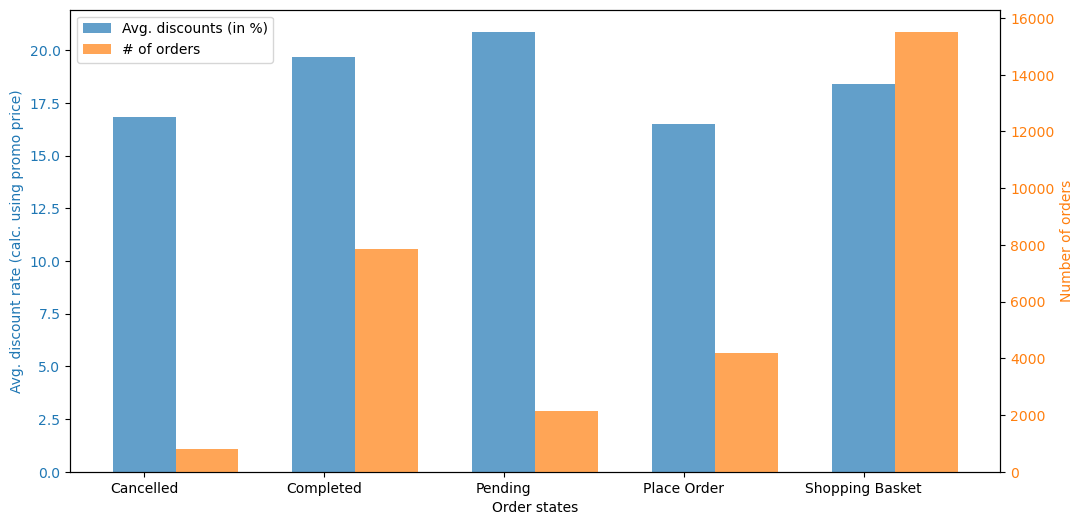

In [15]:
df_merged_ol_prod_ord_all["created_date"]=pd.to_datetime(df_merged_ol_prod_ord_all["created_date"])
df_merged_ol_prod_ord_all['month_year'] = df_merged_ol_prod_ord_all['created_date'].dt.to_period('M')

# Filter data for dates between 01.01 and 14.03 of all years
df_first_three_months = df_merged_ol_prod_ord_all[
    (df_merged_ol_prod_ord_all["created_date"].dt.month <= 3) & 
    (df_merged_ol_prod_ord_all["created_date"].dt.day <= 14)]



All_orders_df = (df_first_three_months.groupby("state", as_index=False).agg({                             
    "product_quantity": "mean", 
    "order_id": "count", 
    "promo_price_revenue": "mean", 
"discount_share": "mean"}))

fig, ax1 = plt.subplots(figsize=(12, 6))

# Set the positions for the bars
bar_width = 0.35
bar_positions = np.arange(len(All_orders_df))

# Plot the bars for discount_share on the left y-axis
ax1.bar(bar_positions, All_orders_df['discount_share'], bar_width, label='Avg. discounts (in %)', color='tab:blue', alpha=0.7)

# Set x-axis labels
ax1.set_xlabel('Order states')
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(All_orders_df['state'])

# Set the y-axis label for discount_share
ax1.set_ylabel('Avg. discount rate (calc. using promo price)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for product_quantity on the right
ax2 = ax1.twinx()
ax2.bar(bar_positions + bar_width, All_orders_df['order_id'], bar_width, label='# of orders', color='tab:orange', alpha=0.7)

# Set the y-axis label for product_quantity
ax2.set_ylabel('Number of orders', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.ticklabel_format(style='plain', axis="y")

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Show the plot
plt.show()

## Discounts vs. #orders (Seasonality corrected)

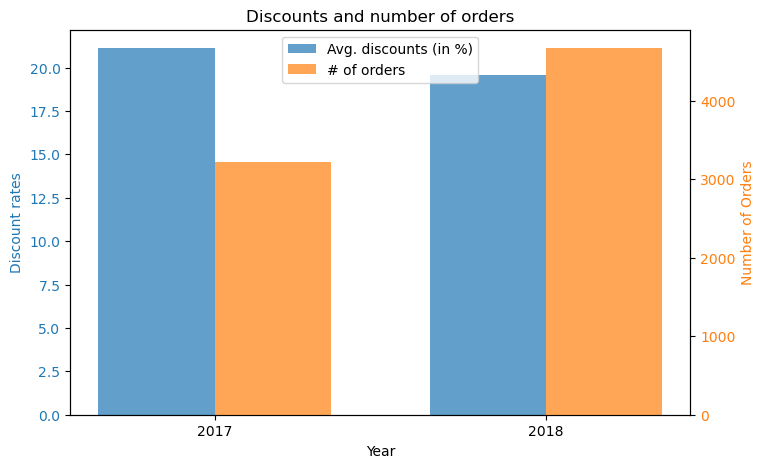

In [11]:
# Convert date to datetime and extract month-year
df_merged_ol_prod_all["date"] = pd.to_datetime(df_merged_ol_prod_all["date"])
df_merged_ol_prod_all['month_year'] = df_merged_ol_prod_all['date'].dt.to_period('M')

# Filter data for dates between 01.01 and 14.03 of all years
df_first_three_months = df_merged_ol_prod_all[
    (df_merged_ol_prod_all["date"].dt.month <= 3) & 
    (df_merged_ol_prod_all["date"].dt.day <= 14) &
    (df_merged_ol_prod_all["state"] == "Completed")]

# Group by year and aggregate the mean values
df_yearly = df_first_three_months.groupby(df_first_three_months["month_year"].dt.year).agg({
    "discount_unit_price_share": "mean",
    "discount_share": "mean",
    "id_order": "nunique",
    "product_quantity": "sum"
}).reset_index()

# Create a subplot with two y-axes
fig, ax1 = plt.subplots(figsize=(8, 5))

bar_width = 0.35
bar_positions = np.arange(len(df_yearly))

# Plotting bars for discount_unit_price_share on the left y-axis
ax1.bar(bar_positions, df_yearly["discount_share"], width=bar_width, label='Avg. discounts (in %)', color='tab:blue', alpha=0.7)
ax1.set_xlabel('Year')
ax1.set_ylabel('Discount rates', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plotting bars for id_order on the second y-axis
ax2.bar(bar_positions + bar_width, df_yearly["id_order"], width=bar_width, label='# of orders', color='tab:orange', alpha=0.7)

# Plotting bars for product_quantity on the second y-axis
# ax2.bar(bar_positions + 2 * bar_width, df_yearly["product_quantity"], width=bar_width, label='# of products', color='tab:red', alpha=0.7)
ax2.set_ylabel('Number of Orders', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Adjusting x-axis ticks and labels
combined_positions = bar_positions + (bar_width / 2)  # Shift xtick positions to the middle of two bars
ax1.set_xticks(combined_positions)
ax1.set_xticklabels(df_yearly["month_year"].astype(str))

# Combine legend handles and labels from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper center')

plt.title("Discounts and number of orders")
plt.show()

## Discounts vs. revenue (Seasonality corrected)

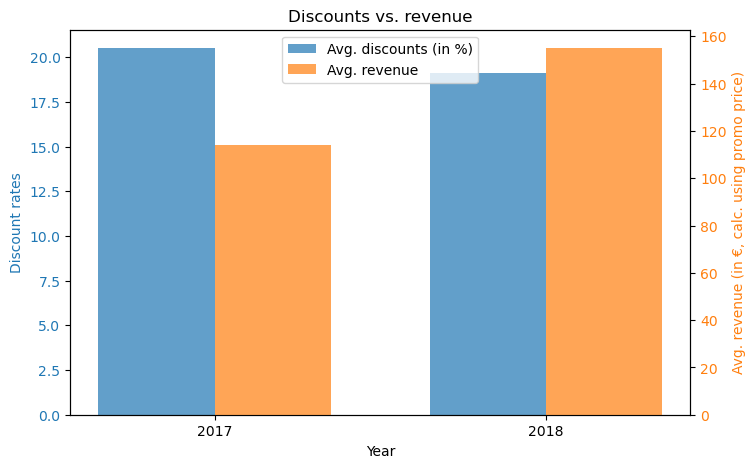

In [12]:
df_merged_ol_prod_ord_all["created_date"]=pd.to_datetime(df_merged_ol_prod_ord_all["created_date"])
df_merged_ol_prod_ord_all['month_year'] = df_merged_ol_prod_ord_all['created_date'].dt.to_period('M')

# Filter data for dates between 01.01 and 14.03 of all years
df_first_three_months = df_merged_ol_prod_ord_all[
    (df_merged_ol_prod_ord_all["created_date"].dt.month <= 3) & 
    (df_merged_ol_prod_ord_all["created_date"].dt.day <= 14) &
    (df_merged_ol_prod_ord_all["state"]=="Completed")]

# Group by year and aggregate the mean values
df_yearly = df_first_three_months.groupby(df_first_three_months["month_year"].dt.year).agg({
    "discount_unit_price_share": "mean",
    "discount_share": "mean",
    "total_paid": "mean",
    "promo_price_revenue": "mean"
}).reset_index()

# Create a subplot with two y-axes
fig, ax1 = plt.subplots(figsize=(8, 5))

bar_width = 0.35  # Adjust the bar width as needed
bar_positions1 = np.arange(len(df_yearly))
bar_positions2 = bar_positions1 + bar_width
bar_positions3 = bar_positions2 + bar_width
bar_positions4 = bar_positions3 + bar_width

# Plotting bars for discount_unit_price_share on the left y-axis
ax1.bar(bar_positions1, df_yearly["discount_share"], width=bar_width, label='Avg. discounts (in %)', color='tab:blue', alpha=0.7)
ax1.set_xlabel('Year')
ax1.set_ylabel('Discount rates', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plotting bars for product_quantity on the second y-axis
ax2.bar(bar_positions2, df_yearly["promo_price_revenue"], width=bar_width, label='Avg. revenue', color='tab:orange', alpha=0.7)
ax2.set_ylabel('Avg. revenue (in €, calc. using promo price)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Adjusting x-axis ticks and labels
combined_positions = bar_positions1 + (bar_width / 2)  # Adjust the space between bars
ax1.set_xticks(combined_positions)
ax1.set_xticklabels(df_yearly["month_year"].astype(str))

# Combine legend handles and labels from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper center')

plt.title("Discounts vs. revenue")
plt.show()

In [ ]:
## Discounts vs #orders (brand wise)

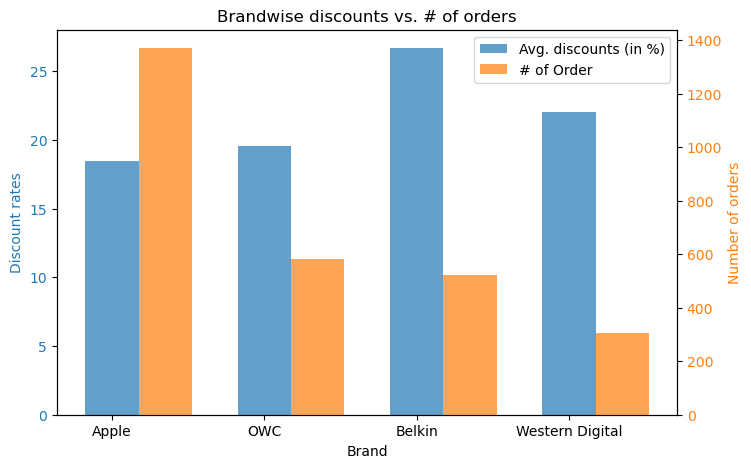

In [13]:
ol_prod_with_brands_df = df_merged_ol_prod_all.merge(brands,
                                how="left",
                                left_on="brand",
                                right_on="short")

# Filter data for dates between 01.01 and 14.03 of all years
ol_prod_with_brands_df = ol_prod_with_brands_df[
    (ol_prod_with_brands_df["date"].dt.month <= 3) & 
    (ol_prod_with_brands_df["date"].dt.day <= 14) &
    (ol_prod_with_brands_df["state"]=="Completed")]


brands_5_most_sold_df = (
                         ol_prod_with_brands_df.groupby("long", as_index=False).agg({
                             "product_quantity": "sum", 
                             "id_order": "nunique", 
                             "discount_share": "mean",
                             "promo_price_revenue": "mean"
                         })
                         .nlargest(4, "product_quantity")
                         )

fig, ax1 = plt.subplots(figsize=(8, 5))

# Set the positions for the bars
bar_width = 0.35
bar_positions = np.arange(len(brands_5_most_sold_df))

# Plot the bars for discount_share on the left y-axis
ax1.bar(bar_positions, brands_5_most_sold_df['discount_share'], bar_width, label='Avg. discounts (in %)', color='tab:blue', alpha=0.7)

# Set x-axis labels
ax1.set_xlabel('Brand')
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(brands_5_most_sold_df['long'])

# Set the y-axis label for discount_share
ax1.set_ylabel('Discount rates', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for product_quantity on the right
ax2 = ax1.twinx()

# Create another bar for id_order on the right y-axis
ax2.bar(bar_positions + bar_width, brands_5_most_sold_df['id_order'], bar_width, label='# of Order', color='tab:orange', alpha=0.7)

# Create a bar for product_quantity on the right y-axis
# ax2.bar(bar_positions + 2*bar_width, brands_5_most_sold_df['product_quantity'], bar_width, label='Product quantity', color='tab:red')

# Set the y-axis label for id_order
ax2.set_ylabel('Number of orders', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Set the y-axis label for product_quantity
#ax2.set_ylabel('Product quantity', color='tab:orange')
#ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Show the plot
plt.title("Brandwise discounts vs. # of orders")
plt.show()

## Discounts vs revenue (brand wise)

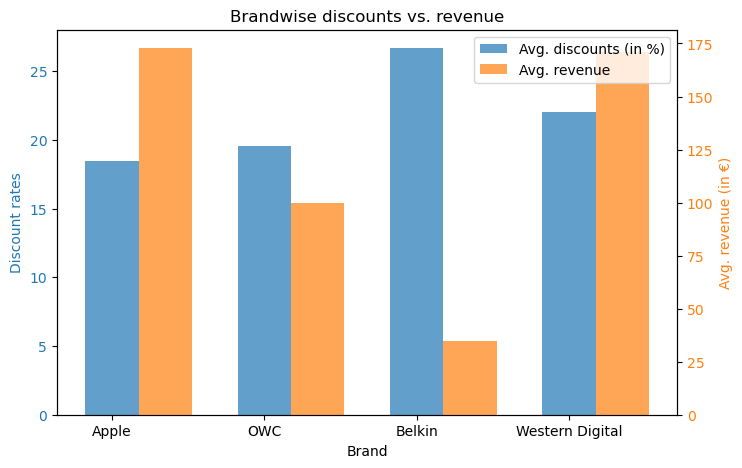

In [16]:
ol_prod_with_brands_df = df_merged_ol_prod_all.merge(brands,
                                how="left",
                                left_on="brand",
                                right_on="short")

# Filter data for dates between 01.01 and 14.03 of all years
brands_5_most_sold_df = ol_prod_with_brands_df[
    (ol_prod_with_brands_df["date"].dt.month <= 3) & 
    (ol_prod_with_brands_df["date"].dt.day <= 14) &
    (ol_prod_with_brands_df["state"]=="Completed")]


brands_5_most_sold_df = (
                         brands_5_most_sold_df.groupby("long", as_index=False).agg({
                             "product_quantity": "sum", 
                             "id_order": "nunique", 
                             "discount_share": "mean",
                             "promo_price_revenue": "mean"
                         })
                         .nlargest(4, "product_quantity")
                         )


fig, ax1 = plt.subplots(figsize=(8, 5))

# Set the positions for the bars
bar_width = 0.35
bar_positions = np.arange(len(brands_5_most_sold_df))

# Plot the bars for discount_share on the left y-axis
ax1.bar(bar_positions, brands_5_most_sold_df['discount_share'], bar_width, label='Avg. discounts (in %)', color='tab:blue', alpha=0.7)

# Set x-axis labels
ax1.set_xlabel('Brand')
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(brands_5_most_sold_df['long'])

# Set the y-axis label for discount_share
ax1.set_ylabel('Discount rates', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for product_quantity on the right
ax2 = ax1.twinx()
ax2.bar(bar_positions + bar_width, brands_5_most_sold_df['promo_price_revenue'], bar_width, label='Avg. revenue', color='tab:orange', alpha=0.7)

# Set the y-axis label for product_quantity
ax2.set_ylabel('Avg. revenue (in €)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Show the plot
plt.title("Brandwise discounts vs. revenue")
plt.show()

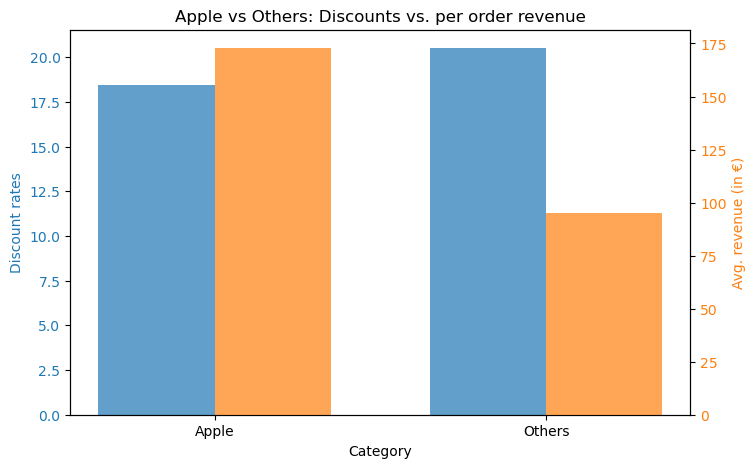

In [34]:
# Create a new column "apple" based on the mapping
df_merged_ol_prod_all["apple"] = df_merged_ol_prod_all["brand"].map({"APP": "Apple", "AP2": "Apple"})

# Replace values other than "Apple" with "Others"
df_merged_ol_prod_all.loc[~(df_merged_ol_prod_all["apple"] == "Apple"), "apple"] = "Others"
apple_grouped = df_merged_ol_prod_all.copy()

apple_grouped = apple_grouped[
    (apple_grouped["date"].dt.month <= 3) & 
    (apple_grouped["date"].dt.day <= 14) &
    (apple_grouped["state"]== "Completed")]

# Group by the "apple" column and aggregate the sum of promo price revenue and mean of discount share
apple_grouped = apple_grouped.groupby("apple").agg(revenue_sum=("promo_price_revenue", "sum"), discount_mean=("discount_share", "mean"), revenue_mean= ("promo_price_revenue", "mean"))

# Create a bar chart with two y-axes
fig, ax1 = plt.subplots(figsize=(8, 5))

bar_width = 0.35
bar_positions1 = np.arange(len(apple_grouped))  # Bar positions for discount_share
bar_positions2 = bar_positions1 + bar_width  # Bar positions for promo_price_revenue

# Plotting bars for discount_share on the left y-axis
color1 = 'tab:blue'
ax1.set_xlabel('Category')
ax1.set_ylabel('Discount rates', color=color1)
ax1.bar(bar_positions1, apple_grouped["discount_mean"], width=bar_width, color=color1, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color1)

# Create a second y-axis
ax2 = ax1.twinx()

# Plotting bars for promo_price_revenue on the right y-axis
color2 = 'tab:orange'
ax2.set_ylabel('Avg. revenue (in €)', color=color2)
ax2.bar(bar_positions2, apple_grouped["revenue_mean"], width=bar_width, color=color2, alpha=0.7)
ax2.tick_params(axis='y', labelcolor=color2)

# Disable scientific notation on the second y-axis
ax2.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=False))

# Adjusting x-axis ticks and labels
combined_positions = bar_positions1 + (bar_width / 2)  # Adjust the space between bars
ax1.set_xticks(combined_positions)
ax1.set_xticklabels(apple_grouped.index)

plt.title("Apple vs Others: Discounts vs. per order revenue")
plt.show()

In [35]:
ol_prod_with_brands_df.category.unique()

array(['other', 'desktop', 'tablet', 'Apple', 'refurbished', 'smartphone',
       'laptop', 'smartwatch', 'Apple: smartphone', 'Apple: laptop',
       'Apple: tablet', 'Apple: desktop', 'Apple: smartwatch',
       'Apple: refurbished'], dtype=object)

In [36]:
df_merged_ol_prod_all.promo_price_revenue.sum()

28087517.031100005

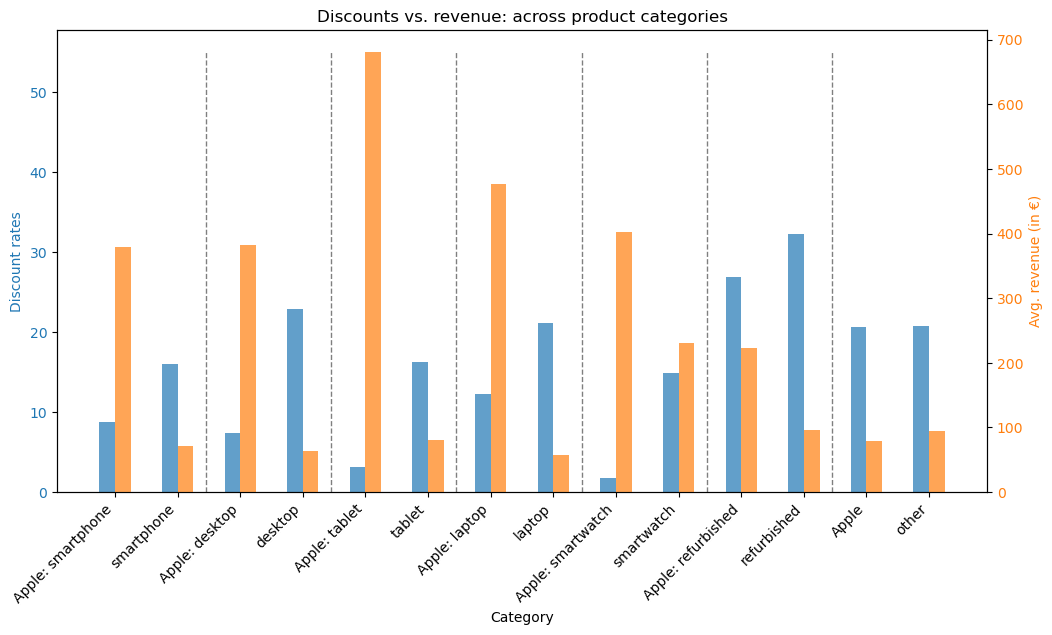

In [37]:
# Assuming df_merged_ol_prod_all is your DataFrame
df_merged_ol_prod_all["date"] = pd.to_datetime(df_merged_ol_prod_all["date"])
df_merged_ol_prod_all['month_year'] = df_merged_ol_prod_all['date'].dt.to_period('M')
order_df_all = df_merged_ol_prod_all.copy()

order_df_all = order_df_all[
    (order_df_all["date"].dt.month <= 3) & 
    (order_df_all["date"].dt.day <= 14) &
    (order_df_all["state"]== "Completed")]

order_df_all = order_df_all.groupby("category").agg({"promo_price_revenue": "mean", "discount_share": "mean"}).reset_index()

# Define the custom order of categories
categories = ['Apple: smartphone', 'smartphone', 'Apple: desktop', 'desktop', 'Apple: tablet', 'tablet', 
              'Apple: laptop', 'laptop', 'Apple: smartwatch', 'smartwatch', 'Apple: refurbished', 
              'refurbished', 'Apple', 'other']

# Sort the DataFrame based on the custom order
order_df_all['category'] = pd.Categorical(order_df_all['category'], categories=categories, ordered=True)
order_df_all = order_df_all.sort_values('category')

# Create a bar chart with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

bar_width = 0.25
bar_positions1 = np.arange(len(order_df_all))  # Bar positions for discount_share
bar_positions2 = bar_positions1 + bar_width  # Bar positions for promo_price_revenue

# Plotting bars for discount_share on the left y-axis
color1 = 'tab:blue'
ax1.set_xlabel('Category')
ax1.set_ylabel('Discount rates', color=color1)
ax1.bar(bar_positions1, order_df_all["discount_share"], width=bar_width, color=color1, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color1)
_ = ax1.vlines(x=5.575, ymin=0, ymax=55, colors='black', linestyles="dashed", alpha=0.5, linewidth=1.0)
_ = ax1.vlines(x=3.575, ymin=0, ymax=55, colors='black', linestyles="dashed", alpha=0.5, linewidth=1.0)
_ = ax1.vlines(x=1.575, ymin=0, ymax=55, colors='black', linestyles="dashed", alpha=0.5, linewidth=1.0)
_ = ax1.vlines(x=7.575, ymin=0, ymax=55, colors='black', linestyles="dashed", alpha=0.5, linewidth=1.0)
_ = ax1.vlines(x=9.575, ymin=0, ymax=55, colors='black', linestyles="dashed", alpha=0.5, linewidth=1.0)
_ = ax1.vlines(x=11.575, ymin=0, ymax=55, colors='black', linestyles="dashed", alpha=0.5, linewidth=1.0)
# Create a second y-axis
ax2 = ax1.twinx()

# Plotting bars for promo_price_revenue on the right y-axis
color2 = 'tab:orange'
ax2.set_ylabel('Avg. revenue (in €)', color=color2)
ax2.bar(bar_positions2, order_df_all["promo_price_revenue"], width=bar_width, color=color2, alpha=0.7)
ax2.tick_params(axis='y', labelcolor=color2)

# Disable scientific notation on the second y-axis
ax2.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=False))

# Adjusting x-axis ticks and labels
combined_positions = bar_positions1 + (bar_width / 2)  # Adjust the space between bars
ax1.set_xticks(combined_positions)
ax1.set_xticklabels(order_df_all['category'], rotation=45, ha='right')

plt.title("Discounts vs. revenue: across product categories")
plt.show()


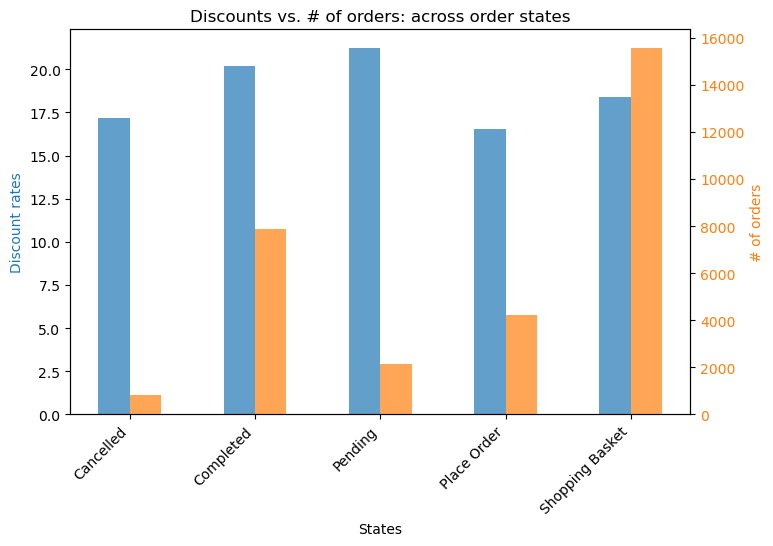

In [38]:
# Assuming df_merged_ol_prod_all is your DataFrame
df_merged_ol_prod_all["date"] = pd.to_datetime(df_merged_ol_prod_all["date"])
df_merged_ol_prod_all['month_year'] = df_merged_ol_prod_all['date'].dt.to_period('M')
order_df_all = df_merged_ol_prod_all.copy()

order_df_all = order_df_all[
    (order_df_all["date"].dt.month <= 3) & 
    (order_df_all["date"].dt.day <= 14) ]

order_df_all = order_df_all.groupby("state").agg({"id_order": "nunique", "discount_share": "mean"}).reset_index()

# Create a bar chart with two y-axes
fig, ax1 = plt.subplots(figsize=(8, 5))

bar_width = 0.25
bar_positions1 = np.arange(len(order_df_all))  # Bar positions for discount_share
bar_positions2 = bar_positions1 + bar_width  # Bar positions for promo_price_revenue

# Plotting bars for discount_share on the left y-axis
color1 = 'tab:blue'
ax1.set_xlabel('States')
ax1.set_ylabel('Discount rates', color=color1)
ax1.bar(bar_positions1, order_df_all["discount_share"], width=bar_width, color=color1, alpha=0.7)
# Create a second y-axis
ax2 = ax1.twinx()

# Plotting bars for promo_price_revenue on the right y-axis
color2 = 'tab:orange'
ax2.set_ylabel('# of orders', color=color2)
ax2.bar(bar_positions2, order_df_all["id_order"], width=bar_width, color=color2, alpha=0.7)
ax2.tick_params(axis='y', labelcolor=color2)

# Disable scientific notation on the second y-axis
ax2.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=False))

# Adjusting x-axis ticks and labels
combined_positions = bar_positions1 + (bar_width / 2)  # Adjust the space between bars
ax1.set_xticks(combined_positions)
ax1.set_xticklabels(order_df_all['state'], rotation=45, ha='right')

plt.title("Discounts vs. # of orders: across order states")
plt.show()


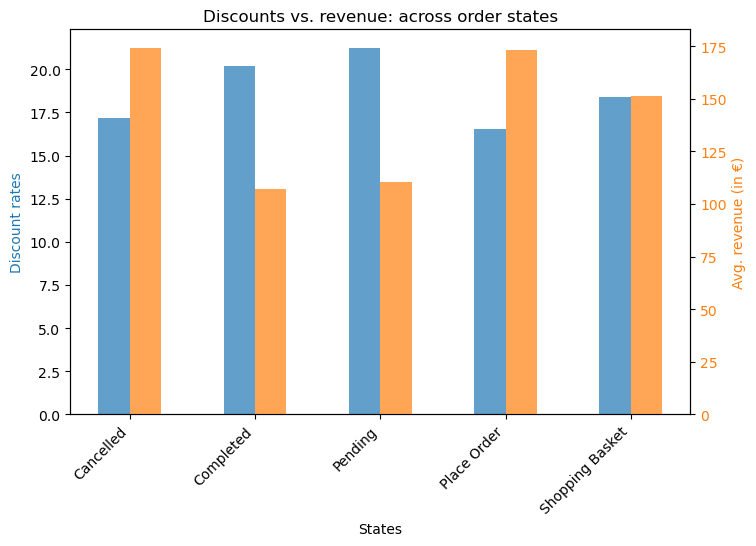

In [39]:
# Assuming df_merged_ol_prod_all is your DataFrame
df_merged_ol_prod_all["date"] = pd.to_datetime(df_merged_ol_prod_all["date"])
df_merged_ol_prod_all['month_year'] = df_merged_ol_prod_all['date'].dt.to_period('M')
order_df_all = df_merged_ol_prod_all.copy()

order_df_all = order_df_all[
    (order_df_all["date"].dt.month <= 3) & 
    (order_df_all["date"].dt.day <= 14) ]

order_df_all = order_df_all.groupby("state").agg({"promo_price_revenue": "mean", "discount_share": "mean"}).reset_index()

# Create a bar chart with two y-axes
fig, ax1 = plt.subplots(figsize=(8, 5))

bar_width = 0.25
bar_positions1 = np.arange(len(order_df_all))  # Bar positions for discount_share
bar_positions2 = bar_positions1 + bar_width  # Bar positions for promo_price_revenue

# Plotting bars for discount_share on the left y-axis
color1 = 'tab:blue'
ax1.set_xlabel('States')
ax1.set_ylabel('Discount rates', color=color1)
ax1.bar(bar_positions1, order_df_all["discount_share"], width=bar_width, color=color1, alpha=0.7)
# Create a second y-axis
ax2 = ax1.twinx()

# Plotting bars for promo_price_revenue on the right y-axis
color2 = 'tab:orange'
ax2.set_ylabel('Avg. revenue (in €)', color=color2)
ax2.bar(bar_positions2, order_df_all["promo_price_revenue"], width=bar_width, color=color2, alpha=0.7)
ax2.tick_params(axis='y', labelcolor=color2)

# Disable scientific notation on the second y-axis
ax2.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=False))

# Adjusting x-axis ticks and labels
combined_positions = bar_positions1 + (bar_width / 2)  # Adjust the space between bars
ax1.set_xticks(combined_positions)
ax1.set_xticklabels(order_df_all['state'], rotation=45, ha='right')

plt.title("Discounts vs. revenue: across order states")
plt.show()


In [ ]:
# Assuming df_merged_ol_prod_all is your DataFrame
df_rev_monthly = df_merged_ol_prod_all.copy()
df_rev_monthly["date"] = pd.to_datetime(df_rev_monthly["date"])
df_rev_monthly['quarterly'] = pd.PeriodIndex(df_rev_monthly['date'], freq='Q')
df_rev_monthly = df_rev_monthly.groupby("quarterly").agg({"total_paid": "sum"})
df_rev_monthly.plot()